In [4]:
conda install -c conda-forge textblob

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Own\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
df= pd.read_csv(r"C:\Users\Own\Desktop\datasets\dataset.csv")
df

,Unnamed: 0,Data,Date,Time,tweetcaption
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...
...,...,...,...,...,...
35261,35261,SwaraBhasker,9/14/2020,13:00:01,I ve never seen SwaraBhasker supporting for th...
35262,35262,TukdeTukdeGang,9/14/2020,13:00:01,hindu DelhiRiots2020 Best thing has happened a...
35263,35263,IndooKiJawani,9/14/2020,13:00:01,The team of IndooKiJawani have a surprise for ...
35264,35264,DelhiRiots2020,9/14/2020,13:00:01,The people of India should protest and demand ...


In [8]:
!pip install tweet-preprocessor
import preprocessor as p

In [9]:
def preprocess_tweet(row):
    text = row['tweetcaption']
    text = p.clean(text)
    return text

In [10]:
df['clean_tweet'] = df.apply(preprocess_tweet, axis=1)
df[:6]

,Unnamed: 0,Data,Date,Time,tweetcaption,clean_tweet
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...
5,5,ArrestBishopFranco,7/14/2020,7:00:21,ArrestBishopFranco He should be arrested and t...,ArrestBishopFranco He should be arrested and t...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweetcaption'].apply(getSubjectivity)
df['Polarity'] = df['tweetcaption'].apply(getPolarity)


df

,Unnamed: 0,Data,Date,Time,tweetcaption,clean_tweet,Subjectivity,Polarity
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,0.524614,0.128278
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,0.725000,-0.037500
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459
...,...,...,...,...,...,...,...,...
35261,35261,SwaraBhasker,9/14/2020,13:00:01,I ve never seen SwaraBhasker supporting for th...,I ve never seen SwaraBhasker supporting for th...,0.553697,0.087281
35262,35262,TukdeTukdeGang,9/14/2020,13:00:01,hindu DelhiRiots2020 Best thing has happened a...,hindu DelhiRiots2020 Best thing has happened a...,0.470394,0.040442
35263,35263,IndooKiJawani,9/14/2020,13:00:01,The team of IndooKiJawani have a surprise for ...,The team of IndooKiJawani have a surprise for ...,0.471429,0.264286
35264,35264,DelhiRiots2020,9/14/2020,13:00:01,The people of India should protest and demand ...,The people of India should protest and demand ...,0.386270,0.275714


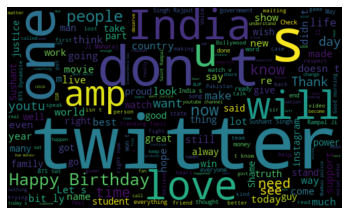

In [12]:
allWords = ' '.join([twts for twts in df['tweetcaption']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
df["tweetcaption"]= df["tweetcaption"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["tweetcaption"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tweetcaption"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tweetcaption"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tweetcaption"].apply(lambda x:SIA.polarity_scores(x)['pos'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'
df[:5]

,Unnamed: 0,Data,Date,Time,tweetcaption,clean_tweet,Subjectivity,Polarity,Analysis,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296,Positive,0.9757,0.800,0.041,0.159,Positive
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,0.524614,0.128278,Positive,0.8438,0.878,0.028,0.093,Positive
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,0.725000,-0.037500,Negative,0.9473,0.797,0.072,0.131,Positive
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000,Positive,0.9324,0.713,0.114,0.173,Positive
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459,Positive,-0.0772,0.710,0.152,0.138,Negative


  GRAPHS AND PLOTS

In [17]:
import numpy as np
from matplotlib import pyplot as plt

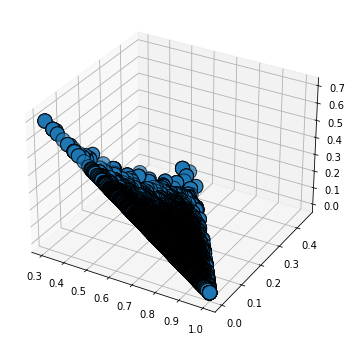

In [35]:
x= df["Neutral Score"]
y=df["Negative Score"]
z=df["Positive Score"]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200)
plt.show()

C:\Users\Own\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neutral Score', ylabel='Negative Score'>

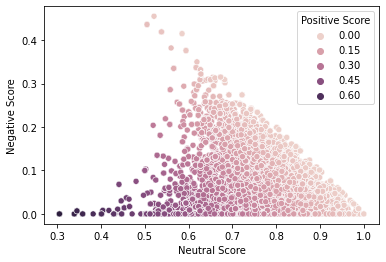

In [37]:
sn.scatterplot(df["Neutral Score"],df["Negative Score"],df["Positive Score"])

C:\Users\Own\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Subjectivity', ylabel='Polarity'>

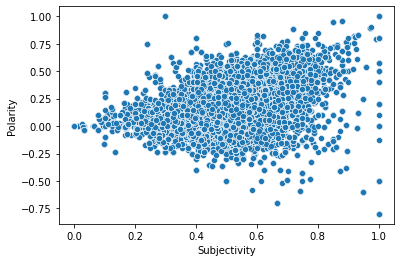

In [30]:
sn.scatterplot(df["Subjectivity"], df["Polarity"])